In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


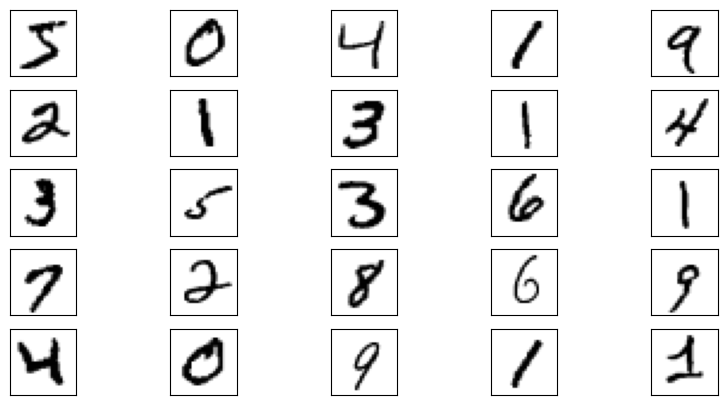

In [20]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [21]:

# x_train = np.expand_dims(x_train, axis=3)
# x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
    ])

(60000, 28, 28)


In [22]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [10]:
# model = keras.Sequential([
#     Flatten(input_shape=(28, 28, 1)),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

In [11]:
# print(model.summary())

In [ ]:

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1397 - accuracy: 0.9569 - val_loss: 0.0751 - val_accuracy: 0.9775
Epoch 2/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 3/5
1500/1500 [==============================] - 61s 40ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 4/5
1159/1500 [======================>.......] - ETA: 12s - loss: 0.0193 - accuracy: 0.9932

1/1 [==============================] - 0s 148ms/step
[[6.0672836e-09 2.0707347e-11 1.0000000e+00 1.8511119e-17 6.5874705e-16
  7.0630214e-21 1.1072329e-11 3.2034423e-16 9.3952818e-15 8.2546231e-18]]
2


TypeError: Invalid shape (28, 28, 1, 1) for image data

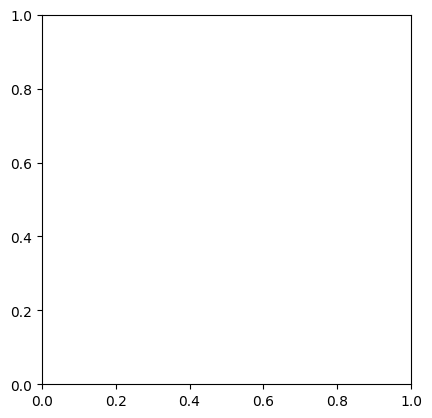

In [13]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
pred

array([7, 2, 1, ..., 4, 5, 6])

[ True  True  True  True  True  True  True  True False  True]
(249, 28, 28)


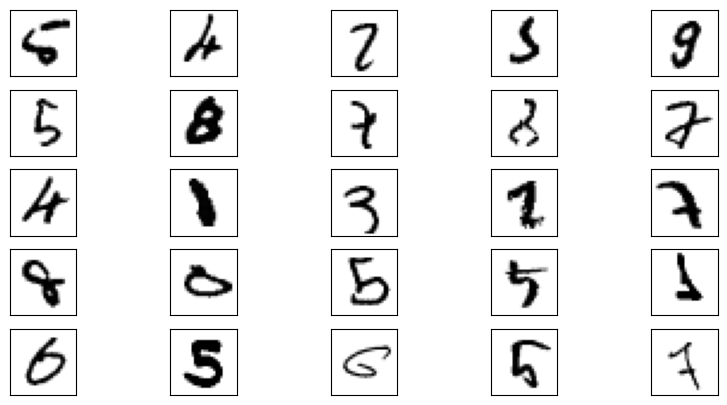

In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()